In [232]:
import pymysql

conn = pymysql.connect(
    host='localhost', 
    user='root', 
    password='',
    db='projectdf',
    port=3307,
    charset='utf8'
)

cursor = conn.cursor()
cursor.execute("SELECT COUNT(itm.HASH) FROM item_drop_exception itm WHERE date(droped_at) between DATE('2020-12-02') and DATE('2020-12-07')")
res = cursor.fetchall()


In [233]:
import pandas as pd

%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

In [249]:
query = "select itemId, name, type from item_exception"

df = pd.read_sql_query(query,conn)

df.to_csv(r'item_table.csv',index=True)

In [236]:
query = "SELECT itemId, channel_name, channel_number, count(itemId) AS VALUE, date(droped_at) FROM item_drop_exception WHERE date(droped_at) = DATE('2020-12-07') GROUP BY CHANNEL_Name, Channel_NUMBER ORDER BY VALUE DESC LIMIT 10" #오늘 에픽이 가장 많이 나온 곳 10까지
df = pd.read_sql_query(query,conn)

df

,itemId,channel_name,channel_number,VALUE,date(droped_at)
0,mqy5vi,심연에 잠긴 하늘성,4,3369,2020-12-07
1,he51ti,심연에 잠긴 하늘성,10,2342,2020-12-07
2,cw1rvi,심연에 잠긴 하늘성,1,2159,2020-12-07
3,qzmzui,심연에 잠긴 하늘성,7,1507,2020-12-07
4,zcb1ti,심연에 잠긴 하늘성,15,1353,2020-12-07
5,9rhzui,심연에 잠긴 하늘성,20,1339,2020-12-07
6,6wug7i,심연에 잠긴 하늘성,11,1178,2020-12-07
7,u79d7i,심연에 잠긴 하늘성,2,1138,2020-12-07
8,7i3evi,심연에 잠긴 하늘성,5,1127,2020-12-07
9,1355vi,심연에 잠긴 하늘성,14,1120,2020-12-07


In [237]:
xlist=list(df['channel_name'])
ylist=list(df['VALUE'])

a=0
for x in xlist:
    xlist[a]= x+' '+str(df['channel_number'][a])
    a+=1


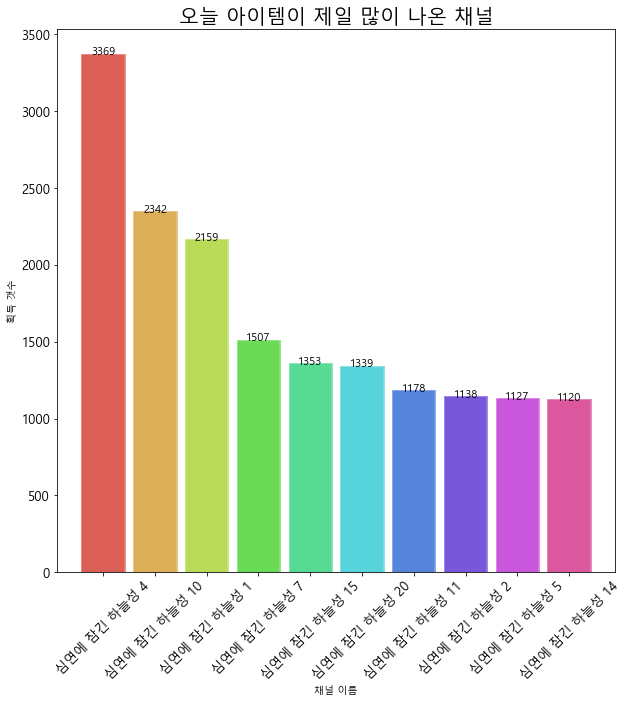

In [238]:
tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

colors = sns.color_palette('hls',len(xlist))

fig = plt.figure(figsize=(10,10)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가

xtick_label_position = list(range(len(xlist))) ## x축 눈금 라벨이 표시될 x좌표
 
plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, xlist, fontsize=tick_size,rotation =45 ) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, ylist, color=colors, \
               edgecolor=colors, alpha=0.7, linewidth=3) ## 바차트 출력
 
 
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
            ylist[i],ha='center',fontsize=11)

## 바 차트 출력
plt.bar(xtick_label_position, ylist,color=colors ) ## 색상 지정
 
plt.title('오늘 아이템이 제일 많이 나온 채널',fontsize=20) # 타이틀 출력
# 바 차트 출력
plt.bar(xtick_label_position, ylist,color=colors ) ## 색상 지정
 
plt.title('오늘 아이템이 제일 많이 나온 채널',fontsize=20) # 타이틀 출력
plt.xlabel('채널 이름') ## x축 라벨 출력
plt.ylabel('획득 갯수') ## y축 라벨 출력
plt.show()

In [239]:
query = "SELECT NAME, VALUE FROM (SELECT itemId, count(itemId) AS VALUE, date(droped_at) FROM item_drop_exception WHERE date(droped_at) = DATE('2020-12-07') GROUP BY itemid) temp join item_exception ie ON ie.itemId = temp.itemid ORDER BY VALUE desc limit 10" #오늘  가장 많이 나온 에픽
df = pd.read_sql_query(query,conn)

df


,NAME,VALUE
0,태음신 : 영귀,371
1,태극천제검,359
2,데우스 이미저리,358
3,이교도 교주의 심판,354
4,음유시인의 만돌린,352
5,샤프 쉐도어,352
6,마력의 샘 : 카스탈리아,351
7,영창 : 불멸의 혼,349
8,신념의 무게,347
9,오버스펙 라이즈,346


In [240]:
xlist = list(df['NAME'])
ylist = list(df['VALUE'])

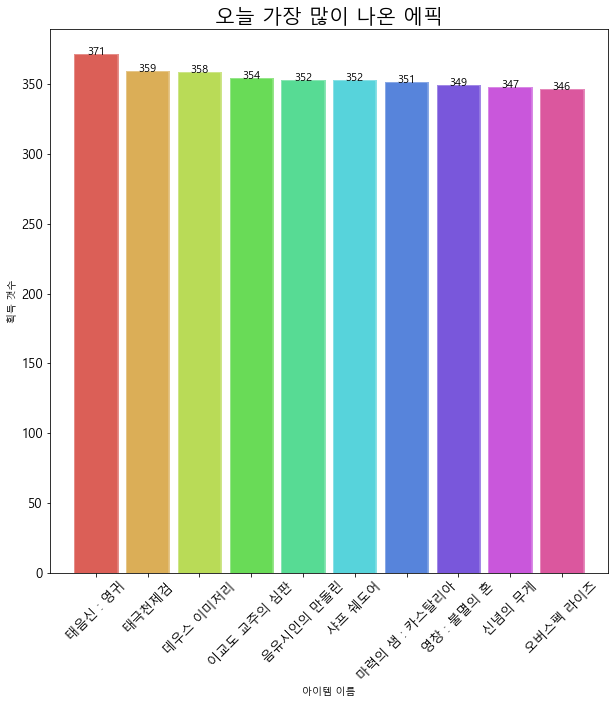

In [241]:
tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

colors = sns.color_palette('hls',len(xlist))

fig = plt.figure(figsize=(10,10)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가

xtick_label_position = list(range(len(xlist))) ## x축 눈금 라벨이 표시될 x좌표
 
plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, xlist, fontsize=tick_size,rotation =45 ) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, ylist, color=colors, \
               edgecolor=colors, alpha=0.7, linewidth=3) ## 바차트 출력
 
 
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
            ylist[i],ha='center',fontsize=11)

## 바 차트 출력
plt.bar(xtick_label_position, ylist,color=colors ) ## 색상 지정
 
plt.title('오늘 가장 많이 나온 에픽',fontsize=20) # 타이틀 출력
plt.xlabel('아이템 이름') ## x축 라벨 출력
plt.ylabel('획득 갯수') ## y축 라벨 출력
plt.show()

In [242]:
query = "SELECT T.channel_name, T.channel_number, T.VALUE, T.num from(SELECT itemId, channel_name, channel_number, COUNT(*) AS VALUE, ROW_NUMBER() over(order by value DESC) NUM FROM item_drop_exception WHERE  itemId = '0355vi' AND date(droped_at) = date(date_add(now(),INTERVAL -5 DAY)) GROUP BY channel_name, channel_number) T WHERE T.NUM<=5 ORDER BY T.num"  

#오늘 부터 5일 전까지 해당아이템이 제일 많이 나온 채널
df = pd.read_sql_query(query,conn)

df

,channel_name,channel_number,VALUE,num
0,심연에 잠긴 하늘성,10,7,1
1,심연에 잠긴 하늘성,1,6,2
2,심연에 잠긴 하늘성,4,5,3
3,심연에 잠긴 하늘성,5,5,4
4,심연에 잠긴 하늘성,14,4,5


In [243]:
xlist=list(df['channel_name'])
ylist=list(df['VALUE'])

a=0
for x in xlist:
    xlist[a]= x+' '+str(df['channel_number'][a])
    a+=1


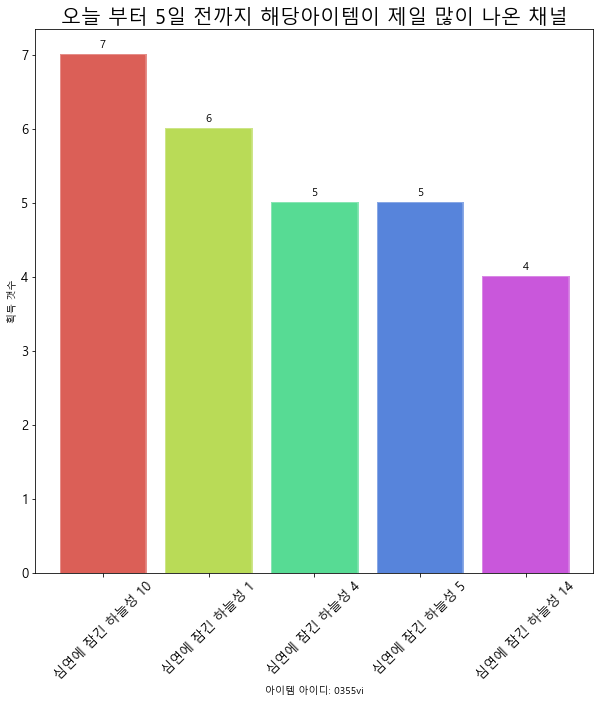

In [244]:
tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 15 ## x축, y축 폰트 사이즈

colors = sns.color_palette('hls',len(xlist))

fig = plt.figure(figsize=(10,10)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가

xtick_label_position = list(range(len(xlist))) ## x축 눈금 라벨이 표시될 x좌표
 
plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, xlist, fontsize=tick_size,rotation =45 ) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, ylist, color=colors, \
               edgecolor=colors, alpha=0.7, linewidth=3) ## 바차트 출력
 
 
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
            ylist[i],ha='center',fontsize=11)

## 바 차트 출력
plt.bar(xtick_label_position, ylist,color=colors ) ## 색상 지정
 
plt.title('오늘 부터 5일 전까지 해당아이템이 제일 많이 나온 채널',fontsize=20) # 타이틀 출력
# 바 차트 출력
plt.bar(xtick_label_position, ylist,color=colors ) ## 색상 지정
 
plt.title('오늘 부터 5일 전까지 해당아이템이 제일 많이 나온 채널',fontsize=20) # 타이틀 출력
plt.xlabel('아이템 아이디: 0355vi') ## x축 라벨 출력
plt.ylabel('획득 갯수') ## y축 라벨 출력
plt.show()

In [245]:
query = "SELECT type, COUNT(id) FROM (SELECT * FROM item_drop_exception WHERE DATE(droped_at) BETWEEN DATE('2020-12-02') AND DATE('2020-12-07')) as P JOIN item_exception ON item_exception.itemId = P.itemId GROUP BY `type`"

df = pd.read_sql_query(query,conn)

df

,type,COUNT(id)
0,epic,736996
1,myth,4990


In [246]:
percentage = 4990/736996

print(percentage)

0.006770728742082725


In [247]:
query ="select itemId, name, type from item_exception"


df = pd.read_sql_query(query,conn)

df

,itemId,name,type
0,0355vi,암흑술사가 직접 저술한 고서,epic
1,03i5vi,가네샤의 영원한 가호,myth
2,07jrvi,세상을 삼키는 분노,myth
3,1355vi,길 안내자의 여행서,epic
4,13i5vi,지고의 화염 - 이프리트,myth
...,...,...,...
228,znztvi,희비교차,epic
229,zp7wvi,죽음을 덮치는 그림자 견갑,epic
230,zqig7i,고대 신수의 기억,epic
231,zqy5vi,어둠을 지배하는 고리,epic
